In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv( "Credit_Card_Applications.csv" )
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

print(X)
print(Y)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]
[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 

# Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler( feature_range=(0, 1) )
X = sc.fit_transform( X )
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


# Training the SOM

In [5]:
from minisom import MiniSom
som = MiniSom( x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5 )

In [6]:
som.random_weights_init( X )
som.train_random( data=X, num_iteration=100 )

# Visualizing the results

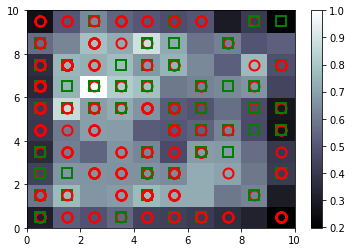

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor( som.distance_map().T )
colorbar()
markers = [ 'o', 's' ]
colors = [ 'r', 'g' ]
for i, x in enumerate(X):
    w = som.winner(x)
    plot( w[0] + 0.5, w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
        )
show()

# Finding the frauds

In [8]:
mappings = som.win_map(X)
print(mappings)

defaultdict(<class 'list'>, {(0, 7): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
       0.        , 0.        , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
       0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.59042402, 1.        , 0.20556391, 0.44642857, 0.5       ,
       0.38461538, 0.5       , 0.00877193, 0.        , 0.        ,
       0.       

In [10]:
frauds = np.concatenate( (mappings[ (2,6) ], mappings[ (1,5) ], mappings[ (4,8) ]), axis = 0 )

print(frauds)

[[0.10139391 0.         0.07639098 0.33928571 0.5        0.61538462
  0.375      0.05701754 1.         1.         0.08955224 1.
  0.5        0.02       0.006     ]
 [0.13174281 0.         0.13909774 0.41964286 0.5        1.
  0.875      0.01754386 1.         1.         0.02985075 1.
  0.5        0.15       0.00551   ]
 [0.18209739 0.         0.22180451 0.03571429 0.5        0.76923077
  0.375      0.03508772 1.         1.         0.02985075 1.
  0.5        0.0835     0.005     ]
 [0.02661685 0.         0.40977444 0.07285714 0.         0.76923077
  0.875      0.00438596 1.         1.         0.34328358 1.
  0.5        0.2275     0.01236   ]
 [0.97284657 0.         0.48496241 0.14285714 0.5        0.30769231
  0.25       0.         1.         0.         0.         0.
  0.5        0.05       0.0096    ]
 [0.90655471 0.         0.30330827 0.05660714 0.         0.
  0.         0.         1.         0.         0.         0.
  0.5        0.16       0.        ]
 [0.99098623 0.         0.167969

In [11]:
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5591035e+07 0.0000000e+00 1.8830000e+01 9.5000000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 1.6250000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 1.0000000e+00 2.0000000e+00 4.0000000e+01 6.0100000e+02]
 [1.5598614e+07 0.0000000e+00 2.3000000e+01 1.1750000e+01 2.0000000e+00
  1.4000000e+01 8.0000000e+00 5.0000000e-01 1.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 3.0000000e+02 5.5200000e+02]
 [1.5611189e+07 0.0000000e+00 2.8500000e+01 1.0000000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 1.6700000e+02 5.0100000e+02]
 [1.5572361e+07 0.0000000e+00 4.1000000e+01 2.0400000e+00 1.0000000e+00
  1.1000000e+01 8.0000000e+00 1.2500000e-01 1.0000000e+00 1.0000000e+00
  2.3000000e+01 1.0000000e+00 2.0000000e+00 4.5500000e+02 1.2370000e+03]
 [1.5808662e+07 0.0000000e+00 4.6000000e+01 4.0000000e+00 2.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 1.0000000e+00 0.